<h3>
Resolução da atividade prática:
</h3>

<p>
Tópico A - Implemente o algoritmo K-Means visto em sala de aula<br>
    <br>i.	Medida de proximidade: distância Euclidiana
    <br>ii.	Centróides iniciais: escolher aleatoriamente K objetos da base de dados
    <br>iii.	K: parâmetro de entrada, especificado pelo usuário
    <br>iv.	O laço de repetição executado até a convergência do algoritmo terá limite máximo de 100 iterações
    <br>v.	Casos de empate na associação de um elemento ao centróide: escolher o primeiro.
</p>

In [179]:
'''
    Importação das bibliotecas necessários
    para a execução do algoritmo
'''

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [180]:
'''
    Importando o dataset a ser usado no
    processo de agrupamento.
    * A coluna que representa a classe do objeto (ESPECIE) 
      é excluída do dataset uma vez que ela não será 
      utilizada para o agrupamento
'''
irisData = pd.read_csv('iris.csv', index_col=0)
irisData = irisData.drop('ESPECIE', axis=1)

'''
    A Análise de Componentes Principais (PCA) é uma técnica de 
    redução de dimensionalidade linear que pode ser utilizada 
    para extrair informações de um espaço de alta dimensão, 
    projetando-o em um subespaço de dimensão inferior.
    
    * Neste caso é feita uma redução para a bidimensionalidade.
      A função 'fit_transform' é utilizada para reduzir a 
      dimensionalidade do dataset.  
'''

pca = PCA(2)
df = pca.fit_transform(irisData)
#display(df)
#display(irisData)

In [181]:
'''
    Inicialmente é definido a forma de implementação do k-means
    por meio da operação KMeans(...)
    Explicação dos parâmetros:
    
    * n_clusters = Define a quantidade de clusters que a 
      execução vai gerar.
    * init = Seleciona os centroides iniciais para cada
      cluster. 'k-means++' ou 'random' 
    * max_iter = Número máximo de iterações do algoritmo 
      k-means para uma única execução.
    * n_init = Número de vezes que o algoritmo k-means 
      é executado com sementes centróides diferentes.
    * random_state = Determina a geração de números 
      aleatórios para inicialização do centróide. 
      Utiliza-se um int para tornar a aleatoriedade determinística.
'''

kmeans = KMeans(n_clusters = 3, 
                init = 'k-means++',
                max_iter = 100, 
                n_init = 'auto', 
                random_state = 0)

'''
    Observação: Na função KMeans do scikit-learn, a medida de distância 
    padrão usada é a distância euclidiana. Portanto, não é necessário 
    especificar tal métrica nos parâmetros da função. 
'''

'\n    Observação: Na função KMeans do scikit-learn, a medida de distância \n    padrão usada é a distância euclidiana. Portanto, não é necessário \n    especificar tal métrica nos parâmetros da função. \n'

<p>
Tópico B - Execute a técnica implementada usando uma base de dados pública, como por exemplo a base Íris<br>
</p>

In [182]:
'''
    A função fit_predict calcula centros de cluster e prevê o 
    índice de cluster para cada amostra do dataset.

    * O retorno de y_kmean é um array de valores contendo
      os valores dos grupos gerados, a posição do array indica
      o elemento ao qual o grupo está associado, exemplo:

      y_kmeans[35] = 1 -> o elemento de valor 35 do dataset pertence ao grupo 1
'''
y_kmeans = kmeans.fit_predict(df)

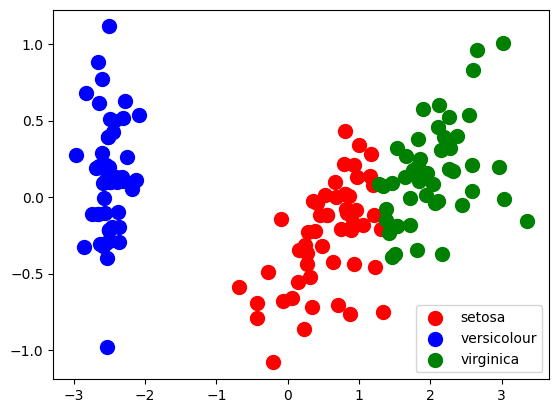

In [183]:
''' 
    A função scatter() do Pyplot permite criar um gráfica de dispersão, 
    com isso, é plotado um ponto para cada elemento. Sendo necessário
    duas matrizes do mesmo comprimento, uma para os valores do eixo x 
    e outra para os valores do eixo y.
'''

plt.scatter(df[y_kmeans == 0,0], df[y_kmeans == 0,1], 
            s = 100, c = 'red', label = 'setosa')

plt.scatter(df[y_kmeans == 1,0], df[y_kmeans == 1,1], 
            s = 100, c = 'blue', label = 'versicolour')

plt.scatter(df[y_kmeans == 2,0], df[y_kmeans == 2,1], 
            s = 100, c = 'green', label = 'virginica')

plt.legend()

<P>
Tópico C - O programa deverá produzir como saída um arquivo indicando para cada elemento, o grupo ao qual ele foi associado.   
</P>
<P>
Tópico D - Se estiver usando alguma ferramenta de alto nível para programa em Python, é necessario de enviar também o arquivo .py  
</P>

In [184]:
''' 
    É produzida o arquivo resultante do agrupamento, contendo a coluna de classificação 
    Observação:
    * 1 - setosa
    * 0 - versicolour
    * 2 - virginica
'''

OutputCSV = irisData
if 'Grupo' not in OutputCSV.columns:
    OutputCSV.insert(OutputCSV.shape[1], 'Grupo', y_kmeans, False)

else:
    print('Classificação já atribuída')

OutputCSV.to_csv('Resultado.csv' )
display(OutputCSV)

,B,C,D,Grupo
A,,,,
5.1,3.5,1.4,0.2,1
4.9,3.0,1.4,0.2,1
4.7,3.2,1.3,0.2,1
4.6,3.1,1.5,0.2,1
5.0,3.6,1.4,0.2,1
...,...,...,...,...
6.7,3.0,5.2,2.3,2
6.3,2.5,5.0,1.9,2
6.5,3.0,5.2,2.0,2
